# Network Analysis (I)

In this notebook we introduce the network analysis. The basic measures and graphics are computed using NetworkX. We explore the networks at different levels (node, community and global properties).


## Contents of the notebook:

**1. Networks and Graphs introduction**
  
      1.1 Graph analysis
      
      1.2 Basic usage of Networkx

**2. Network Analysis**

	2.1 Network analysis with NetworkX
    
    2.2 Connected Components
	
    2.3 Centrality
    
    2.4 Ego Networks

***We will use the datasets:***
* Hamsterster friendships network dataset
* HIV Dataset

## 1. Networks and Graphs introduction

A network is a **system of interconnected entities that can communicate and share resources with each other**. These entities, known as **nodes**, can be anything from computers and servers to people and organizations, depending on the type of network. The connections between these nodes are called **edges or links**, and they represent the pathways through which information, resources, or interactions flow.

### Network Examples:

Every time we find a connection or relationship between two or more entities, like friendship among people, bank transactions, or postal mail, chances for that being analyzed as a **network** are high. Facebook, Twitter, tumblr, Instagram are all **social networks**. 

In recent years, vast amounts of network data are being generated and collected in different fields:

- Sociology: web pages, mobile phones, social networks, blog networks.
- Technology: Internet routers, vehicular flows, power grids.
- Academia: co-authorship, mentions.
- Literature: play networks, publication networks.

#### Particular Examples:

**Example 1**:
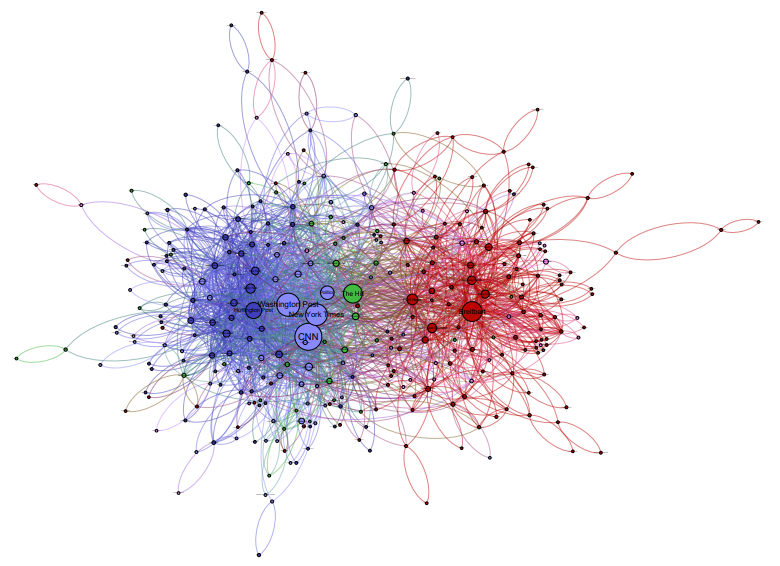

Fig.: Network map based on Twitter media sharing, September 2016. Figure 46 on the [report](https://dash.harvard.edu/bitstream/handle/1/33759251/2017-08_electionReport_0.pdf).

The sharing of media sources by users on Twitter provides a broader perspective on the role and influence of media sources among people engaged in politics through Twitter. The differential media sharing patterns of Trump and Clinton supporters on Twitter enable a detailed analysis of the role of partisanship in the formation and function of media structures.

**Example 2**:

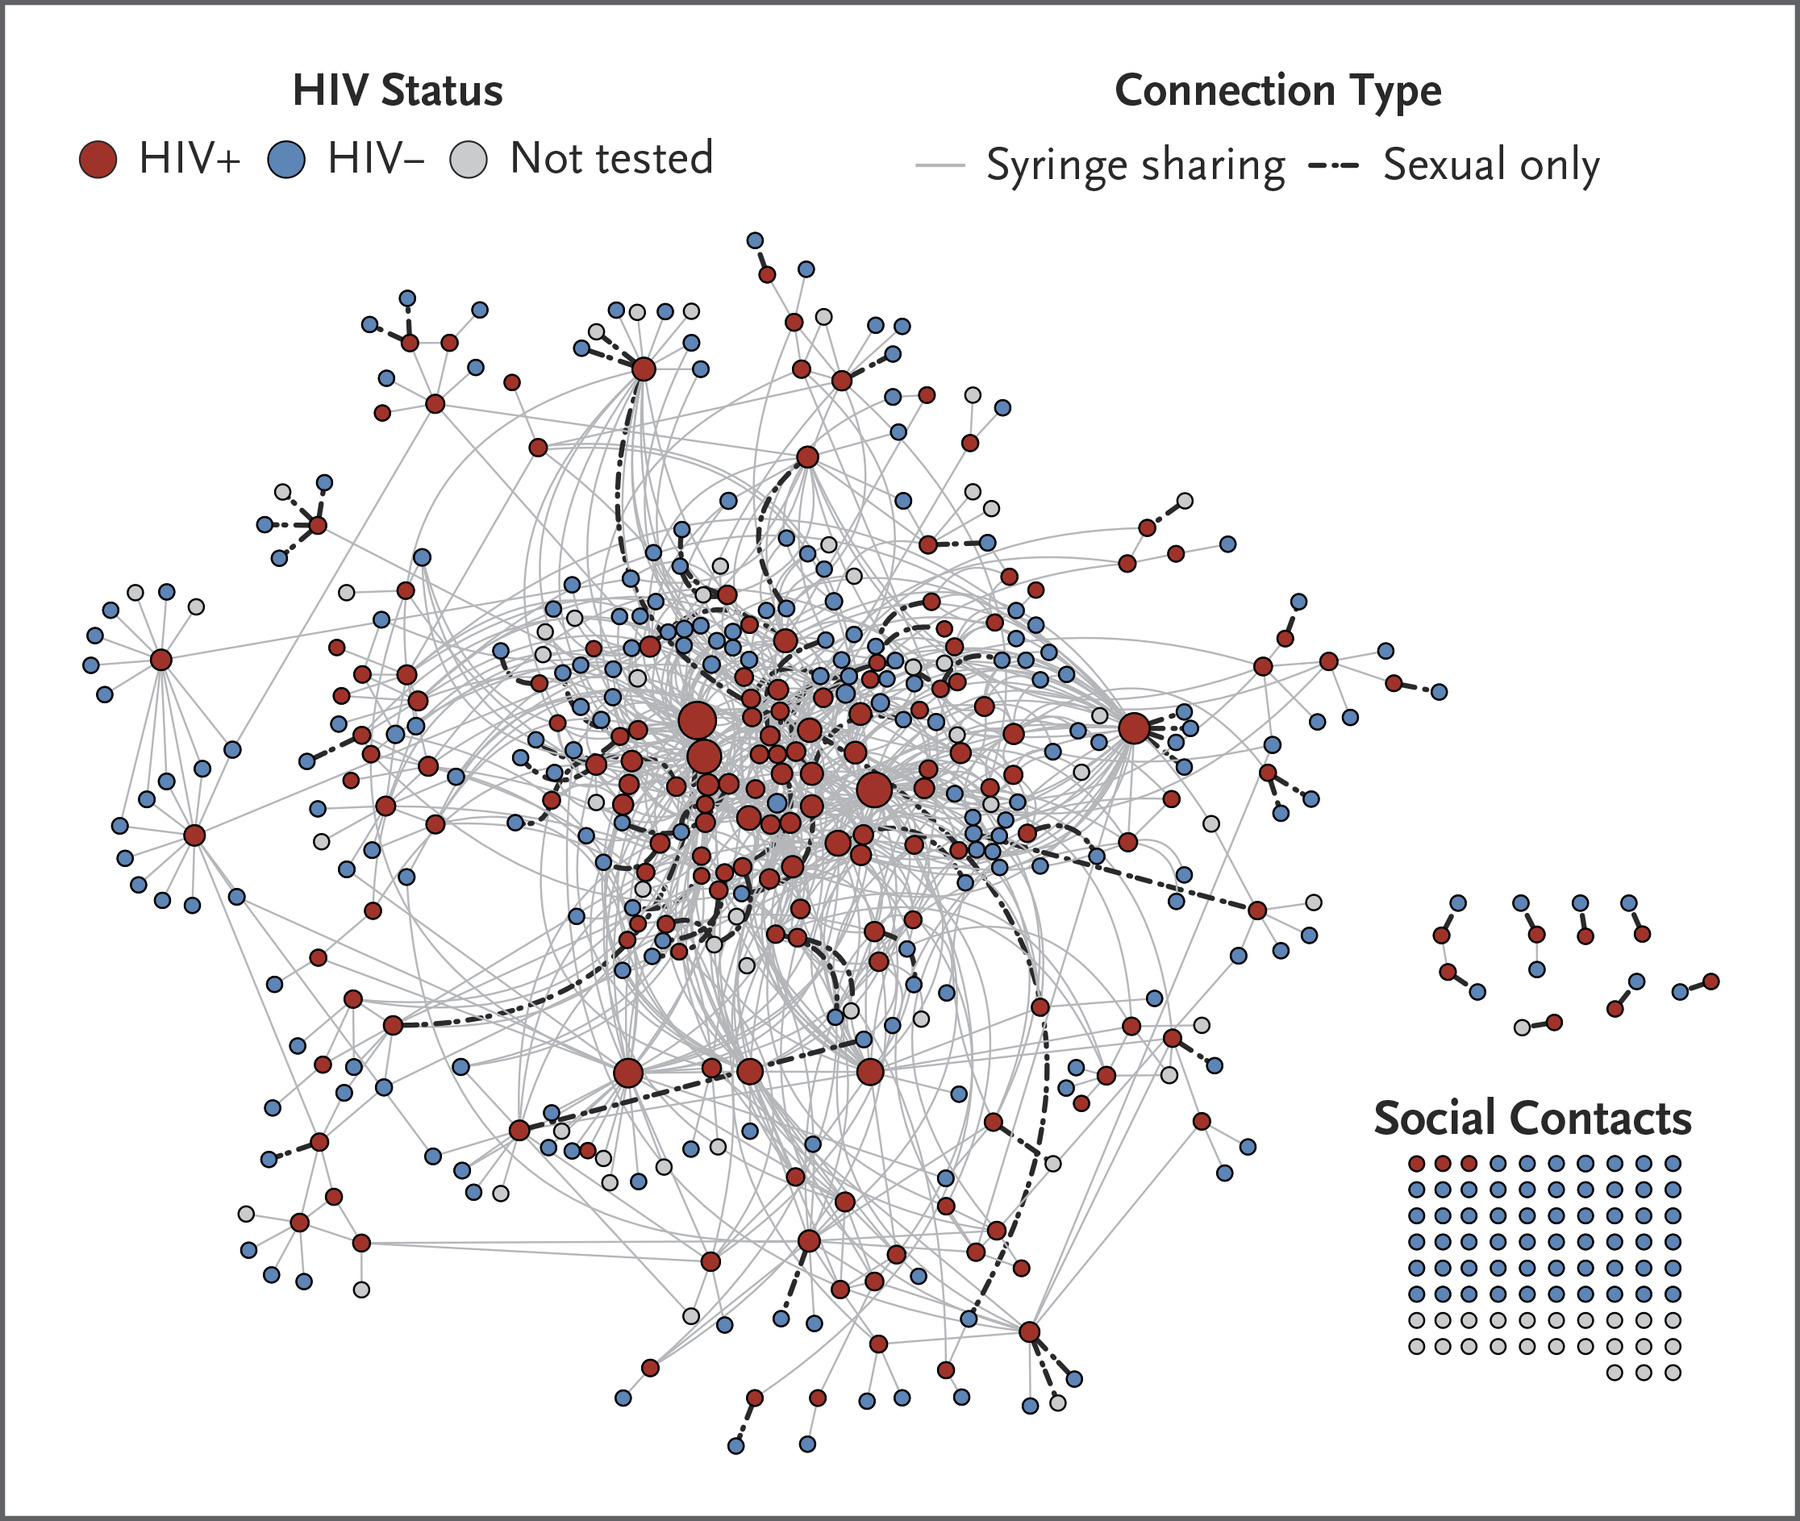

Fig.: Syringe-Sharing Network of Persons with Newly Diagnosed HIV Infection. Figure 3 on the [article](https://www.nejm.org/doi/full/10.1056/nejmoa1515195).

This figure diagrams the network of 181 case patients in southeastern Indiana who received a new diagnosis of HIV infection between November 18, 2014, and November 1, 2015; the network is based on the syringe-sharing and sexual partners of the case patients at the time of their HIV diagnosis. The network comprises 536 unique persons and 1058 unique connections: 841 of the contacts in this network (79.5%) were syringe-sharing contacts, 81 (7.7%) were sexual contacts only, and 136 (12.8%) were syringe-sharing and sexual contacts. Reported contacts are represented by circles colored to reflect HIV status, and the sizes of the circles are proportional to the number of connections, with larger circles indicating more connections (range of number of connections, 1 to 56). Connections are represented by a solid gray line if the contact was a syringe-sharing contact only or a syringe-sharing and sexual contact and by a dashed black line if the contact was a sexual contact only. The 83 “social contacts” in the bottom right are persons with no reported syringe-sharing or sexual connections to other members of the network. These social contacts were named by case patients as persons the case patients knew who could benefit from an HIV test.

#### How can we analyze these networks?

In mathematics, networks are called *graphs* and *Graph Theory* is a huge field of study. So almost all the tools we need to analyze networks are already there, at least in theory.

And most importantly, **why would we want to analyze these networks?**

Studying and analyzing networks can give us insights about data that are hard to find by other means.

There are two very different kinds of goals involved in studying networks, but they lead us to very similar structural properties of the networks. 
- to find and exploit structures that work efficiently for transmission of effects through the network. For example, this would be the goal of a marketing analyst trying to find the best strategy for spreading his/her message. 
- to understand an existing structure to see what weaknesses and efficiencies it may have. For example, the epidemiological study of a community of people is concerned with what properties it has that promote “efficient” transmission of a disease. 

Needless to say, what is “bad” or “good” depends entirely on the purposes at hand. What may be a bad feature from the epidemiolgist’s or ecologist’s perspective may be a good feature for the marketing analyst’s needs. 

Source [here](http://nbviewer.ipython.org/github/versae/data_for_humanists/blob/master/class18.ipynb). And, for more info look in [Python for Social Networks](http://www-rohan.sdsu.edu/~gawron/python_for_ss/course_core/book_draft/Social_Networks/Social_Networks_intro.html).


There are large amounts of freely available data:
* [The Stanford Large Network](https://snap.stanford.edu/data/) (SNAP) collection which has links to a great variety of networks, ranging from Facebook style social networks to citation networks to Twitter networks to open communities like Live Journal. 
* [Network Data Repository.](http://networkrepository.com) Exploratory Analysis & Visualization. The largest network and graph data repository with over 500+ donations. 
* [KONECT](http://konect.uni-koblenz.de/) (the Koblenz Network Collection) is a project to collect large network datasets of all types in order to perform research in network science and related fields.
* [Mark Newman’s data page](http://www-personal.umich.edu/~mejn/netdata/). For smaller scale practice networks.

### 1.1 Graph Analysis

A simple graph, in Mathematics and Computer Science consists of vertices or **nodes**. Nodes may or may not be connected with one another. The connecting line between two nodes is called an **edge** or a relationship. If the edges between the nodes are undirected, the graph is called an **undirected graph**. If the edges are directed from one node to another, a graph is called a **directed graph**. A directed edge is called an arc or a directed relationship.  

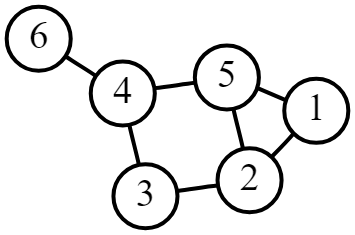
    
A drawing of a labeled undirected graph on 6 nodes and 7 edges. [Wiki](http://en.wikipedia.org/wiki/Graph_(mathematics)).
</div>


### Seven Bridges of Königsberg: a historically notable problem in mathematics.

The origins of graph theory take us back in time to the Königsberg of the 18th century. Königsberg was a city in Prussia that time. The river Pregel flowed through the town, creating four islands. The city and the islands were connected by seven bridges as shown in the Figure below. The inhabitants of the city were moved by the question, **was it possible to take a walk through the town by visiting each area of the town and crossing each bridge only once?** 

Leonhard Euler solved the problem in 1735 by proving that it is **not possible**. He found out that the choice of a route inside each land area is irrelevant and that the only thing which mattered is the
order (or the sequence) in which the bridges are crossed. He had formulated an abstraction of the problem, eliminating unnecessary facts and focussing on the land areas and the bridges connecting them. This way, he created the foundations of Graph Theory. If we see a "land area" as a node and each bridge as an edge, we have "reduced" the problem to a graph. 

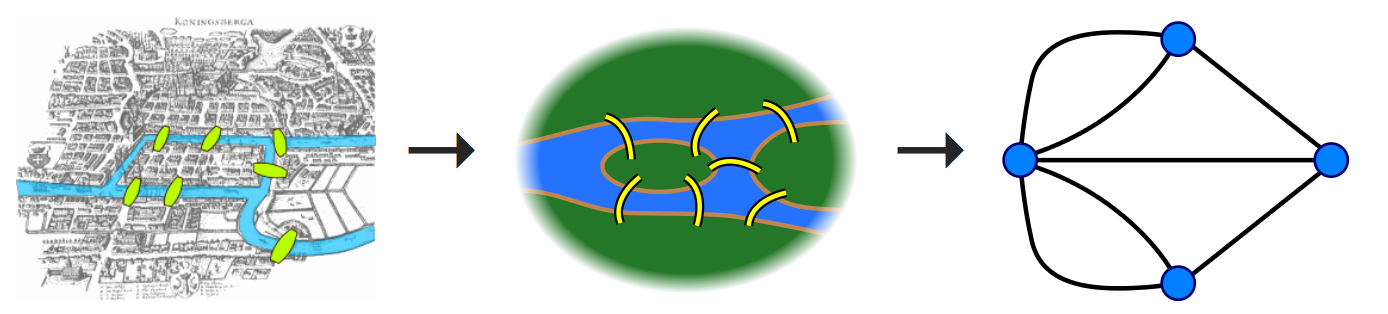

*Source: [Seven Bridges of Königsberg](http://en.wikipedia.org/wiki/Seven_Bridges_of_K%C3%B6nigsberg)*
</div>

Euler showed that the possibility of a walk through a graph, traversing each edge exactly once, depends on the degrees of the nodes. Euler's argument shows that **a necessary and sufficient condition for the walk of the desired form is that the graph be connected and have exactly zero or two nodes of odd degree.** 
Such a walk is now called an *Eulerian path* or *Euler walk* in his honor. Further, if there are nodes of odd degree, then any Eulerian path will start at one of them and end at the other. Since the graph corresponding to historical Königsberg has four nodes of odd degree, it cannot have an Eulerian path.

### *Some more concepts*

The **degree** of a node is the number of edges connecting it. If a network is directed, meaning that edges point in one direction from one node to another node, then nodes have two different degrees, the **in-degree**, which is the number of incoming edges, and the **out-degree**, which is the number of outgoing edges. The maximum and minimum degree of a graph are the maximum and minimum degree of its nodes.

There are many other sorts of information one might want to add to graphs to keep track of properties of the entities the nodes are modeling or of their relationships. One of the most important ideas that the links between the nodes may have strengths or **weights** that represent some real world fact about how the entities are related. In this case, the graph is called a **weighted graph**

We define a **path** in a network to be a sequence of nodes connected by edges. A number of important structural properties of graphs require computing **shortest paths** or the lengths of shortest paths. 
In graph theory, the shortest path problem is the problem of finding a path between two nodes in a graph such that the sum of the weights of its constituent edges (for weighted graphs)  or the number of edges (for unweighted graphs) is minimized.

Next, we show three different graphs examples:

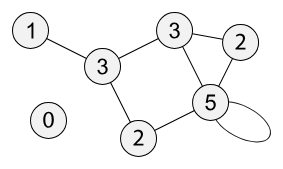
    
Example 1. A graph with nodes labeled by **degree**.
[Wiki](http://en.wikipedia.org/wiki/Degree_(graph_theory)). 
</div>

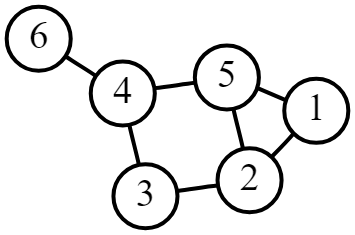
    
Example 2. Paths (6, 4, 5, 1) and (6, 4, 3, 2, 1) are both paths between nodes 6 and 1.
[Wiki](http://en.wikipedia.org/wiki/Shortest_path_problem). 
</div>

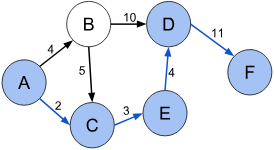
    
Example 3. Shortest path (A, C, E, D, F) between nodes A and F in the weighted directed graph.
[Wiki](http://en.wikipedia.org/wiki/Shortest_path_problem). 
</div>


Some more of the fundamental concepts and definitions surrounding graphs.

* **Cycles**. A cycle is a path with at least three edges, in which the first and last nodes are the same, but otherwise all nodes are distinct.
    In Example 2, a cycle with no repeated edge or vertex is 1-2-5-1. A closed path or walk with a repeated vertex (4) is 6-4-5-2-3-4-6 


* **Connectivity**. Given a graph, it is natural to ask whether every node can reach every other node by a path. With this in mind, we say that a graph is connected if for every pair of nodes, there is a path between them.   
    In Example 1, with node 0, this graph is **disconnected**; the rest of the graph is connected.


* **Components**. A **connected component** of a graph (often shortened just to the term component) is a subset of the nodes such that every node in the subset has a path to every other.
    In Example 1, the graph has two connected components.


* **Subgraphs**. A subgraph is a subset of the nodes of a graph, and all of the edges linking these nodes. Any group of nodes can form a subgraph. 

#### Graphs in Python 

[NetworkX](https://networkx.github.io/documentation/stable/index.html) (NX) is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.
NX was developed at Los Alamos National Laboratory to look at the results as a network and understand some of its properties.

**Other packages:**

[NetworKit](https://networkit.iti.kit.edu). An open-source toolkit for high-performance network analysis. It implements efficient graph algorithms, many of them parallel to utilize multicore architectures. Focus on parallelism and scalability.

[graph-tool](http://graph-tool.skewed.de). The core data structures and algorithms are implemented in C++. This confers it a level of performance that is comparable (both in memory usage and computation time) to that of a pure C/C++ library.


[GUESS](http://graphexploration.cond.org) Graph Exploration System. Exploratory data analysis and visualization tool for graphs and networks. The system contains a domain-specific embedded language called Gython, an extension of Python, or more specifically Jython (Python for the Java Platform).



### 1.2 Basic usage of Networkx 
We start by setting the matplotlib and pylab plot and selecting our figure size to be a bit different than the automatic defaults.

In [1]:
%matplotlib inline 
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
pylab.rcParams['figure.figsize'] = (12.0, 6.0)
import numpy as np

In [3]:
pip install decorator==5.0.9

  Attempting uninstall: decorator
    Found existing installation: decorator 5.1.1
    Uninstalling decorator-5.1.1:
      Successfully uninstalled decorator-5.1.1
Note: you may need to restart the kernel to use updated packages.


In [4]:
# The package for handling the graph objects
import networkx as nx

# Matplotlib is the default package for rendering the graphs
import matplotlib.pyplot as plt

Create and visualize a graph:

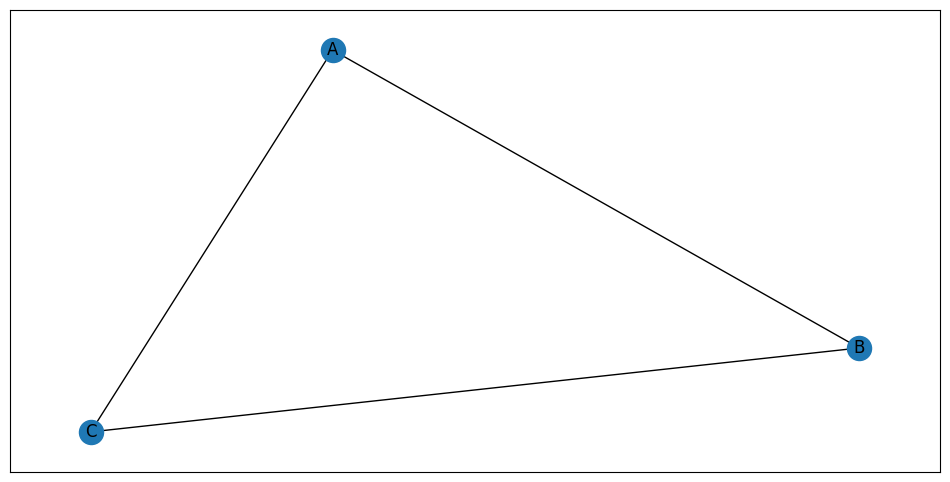

In [5]:
def simple_graph():
    #create an empty graph
    G = nx.Graph()
    
    #add three edges
    G.add_edge('A','B');
    G.add_edge('B','C');
    G.add_edge('C','A');

    #draw the graph
    nx.draw_networkx(G)

    #show
    plt.show()

simple_graph()

We can create an instance of the class `nx.Graph` and then start adding edges or adding nodes.
There are others classes for other types of graphs, like `nx.DiGraph` for directed graphs.

Delete a particular node 'A' in G

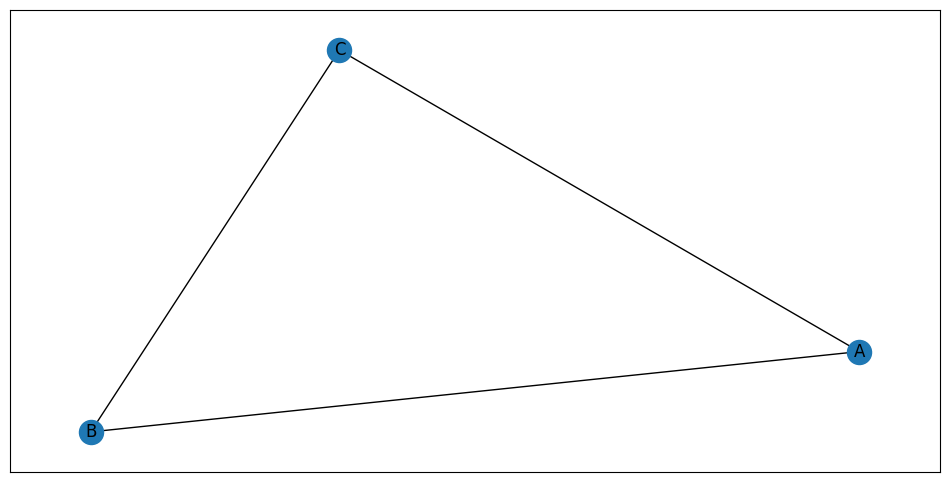

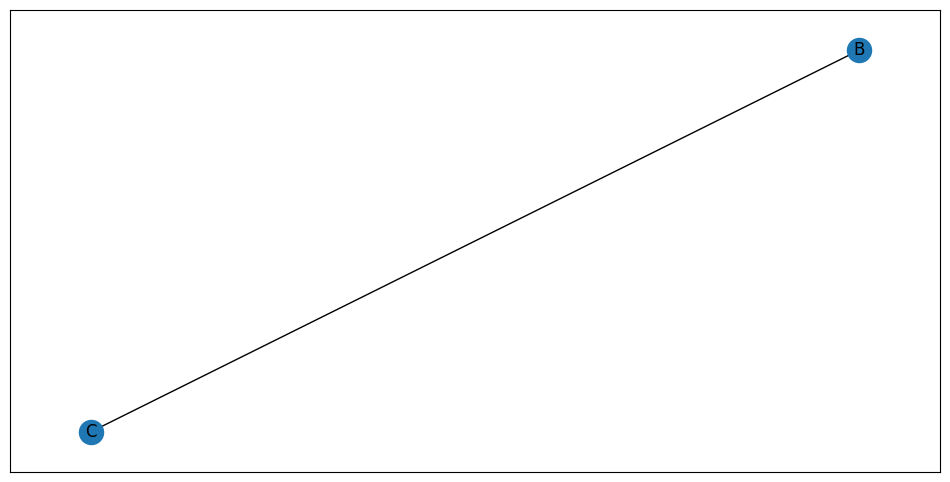

In [6]:
def delete_nodes_in_graph():
    #create an empty graph
    G = nx.Graph()
    
    #add three edges
    G.add_edge('A','B');
    G.add_edge('B','C');
    G.add_edge('C','A');

    #draw the graph
    nx.draw_networkx(G)

    #show the original graph
    plt.show()

    #remove node 'A'
    G.remove_node('A')

    #re-draw the graph
    nx.draw_networkx(G)

    #show the graph after removal of 'A'
    plt.show()

delete_nodes_in_graph()

Delete specific edges {(A,B), (A,C)} from G

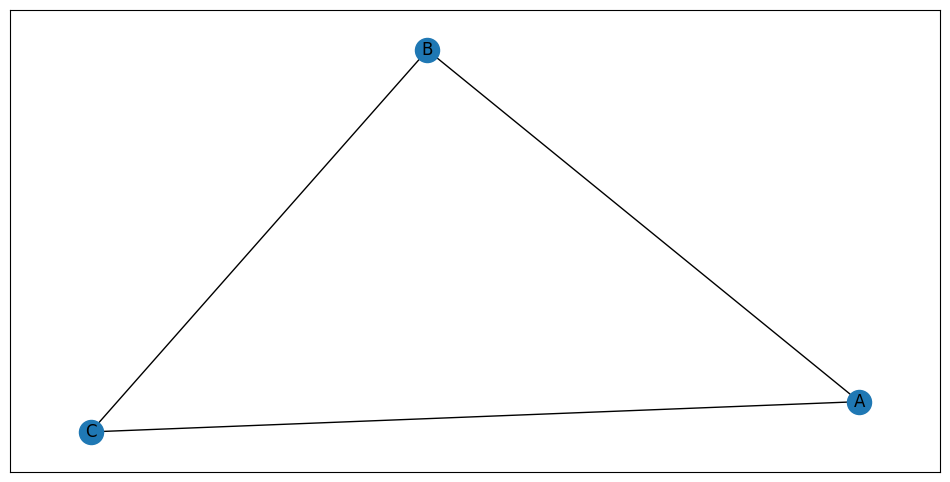

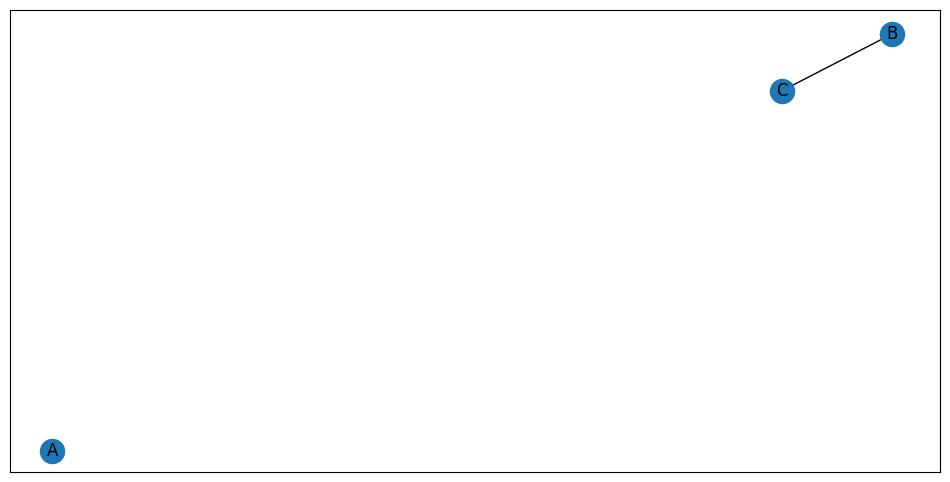

In [7]:
def delete_specific_edge_in_graph():
    #create an empty graph
    G = nx.Graph()
    
    #add three edges
    G.add_edge('A','B');
    G.add_edge('B','C');
    G.add_edge('C','A');

    #draw the graph
    nx.draw_networkx(G)

    #show the original graph
    plt.show()

    #remove the edges
    #   'A' - 'B'
    #   'A' - 'C'
    G.remove_edge('A','B')
    G.remove_edge('A','C')

    #re-draw the graph
    nx.draw_networkx(G)

    #show the graph after removal of edges
    plt.show()
    #notice that only the connections to 'A' are removed but node 'A' is not removed

delete_specific_edge_in_graph()

Create a graph which has no edges

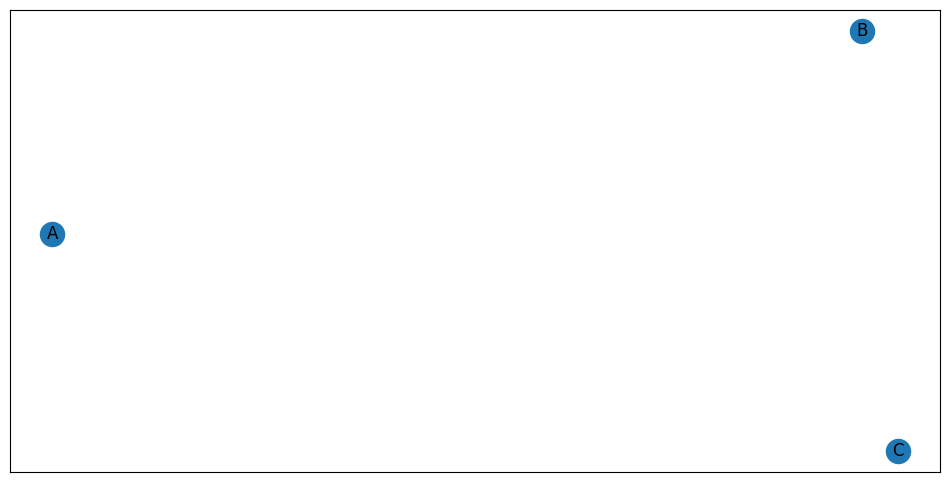

In [8]:
def add_stand_alone_nodes():
    #create an empty graph
    G = nx.Graph()
    
    #add three edges
    G.add_node('A');
    G.add_node('B');
    G.add_node('C');

    #draw the graph
    nx.draw_networkx(G)

    #show the graph after addition of nodes
    plt.show()

add_stand_alone_nodes()

Customize node size and node labels in the graph

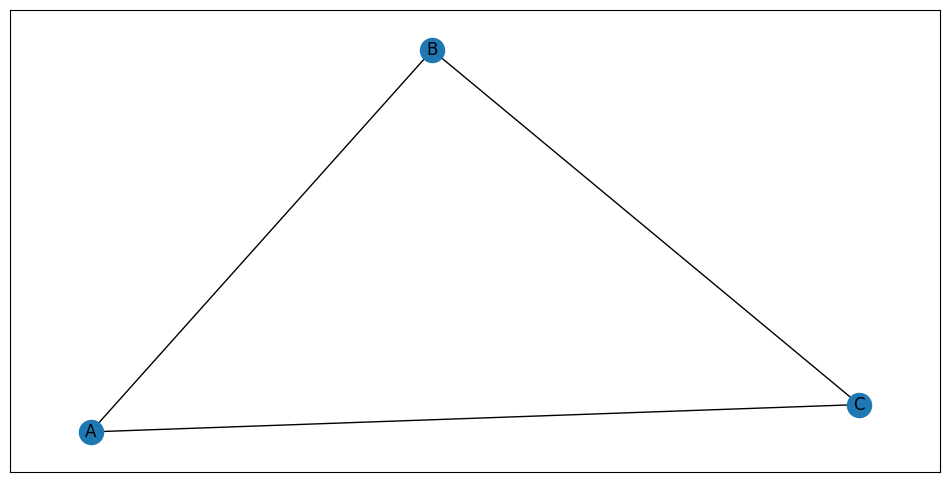

In [9]:
def custom_labels_and_size_of_nodes():
    #create an empty graph
    G = nx.Graph()
    
    #add three edges
    G.add_edge('A','B');
    G.add_edge('B','C');
    G.add_edge('C','A');

    #draw the graph
    nx.draw_networkx(G)

    #show the created graphs
    plt.show()

    labels={}
    labels['A'] = 'AA'
    labels['B'] = 'BB'
    labels['C'] = 'CC'

    #draw the graph
    pos = nx.spring_layout(G) # A dictionary with nodes as keys and positions as values.

    # Draw the network assigning size 1000, 2000 and 3000 to the nodes and the labels defined above:
    # ...
    # Complete the code here
    # ...
    
    #show with custom labels
    plt.show()
    
custom_labels_and_size_of_nodes()

Customize node colors

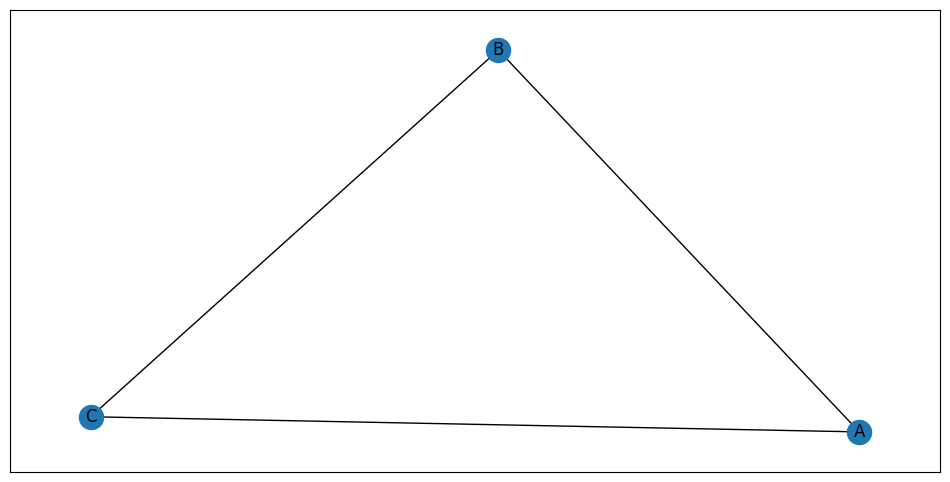

In [10]:
def custom_node_edge_colors():
    #create an empty graph
    G = nx.Graph()
    
    #add three edges
    G.add_edge('A','B');
    G.add_edge('B','C');
    G.add_edge('C','A');

    #draw the graph
    nx.draw_networkx(G)

    #show the created graphs
    plt.show()
    
    custom_edge_color={}
    custom_edge_color['A','B'] = 'c'
    custom_edge_color['B','C'] = 'm'
    custom_edge_color['C','A'] = 'y'

    #draw the graph
    pos = nx.spring_layout(G) # A dictionary with nodes as keys and positions as values.
    
    # Draw the network assigning colors blue, green and orange for the nodes and the colors defined above for the edges:
    # ...
    # Complete the code here
    # ...
                           
    #show with custom node colors
    plt.show()

custom_node_edge_colors()

Creating a weighted graph and displaying the weight vales on edges

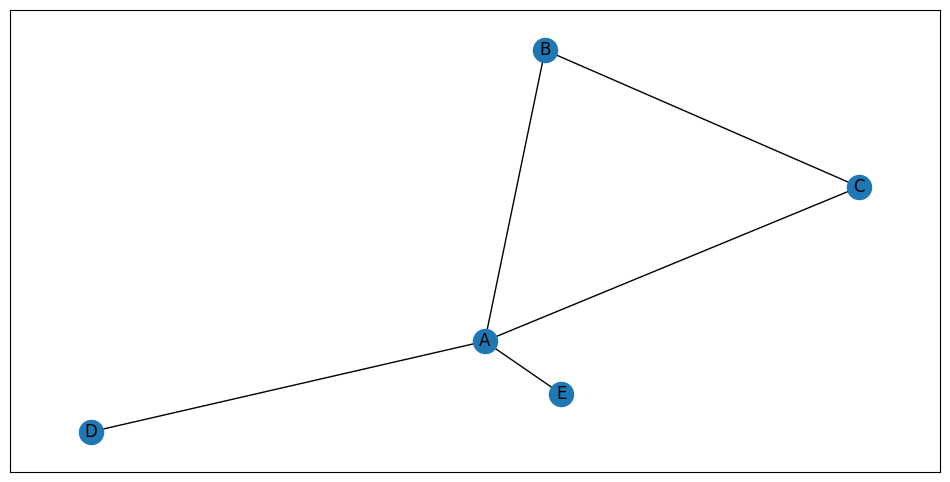

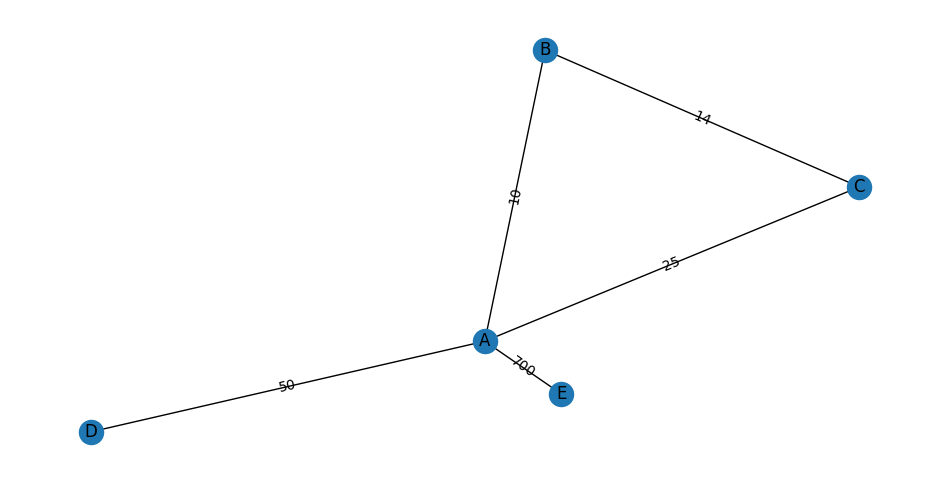

In [11]:
   def weighted_graph_with_edge_labels():
    #create an empty graph
    G = nx.Graph()
    
    #add three edges
    G.add_edge('A','B');
    G.add_edge('B','C');
    G.add_edge('C','A');
    G.add_edge('D','A');
    G.add_edge('E','A');

    G['A']['B']['weight'] = 10
    G['B']['C']['weight'] = 14
    G['C']['A']['weight'] = 25
    G['D']['A']['weight'] = 50
    G['E']['A']['weight'] = 700

    # position the nodes by Force Layout
    pos = nx.spring_layout(G)
    
    # position the nodes according the output
    # from the spring/force layout algorithm
    nx.draw_networkx(G,pos)

    #show the created graph
    plt.show()
    #shorter edge length indicates higher weight

    edge_weight=dict([((u,v,),int(d['weight'])) for u,v,d in G.edges(data=True)])

    nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_weight)
    nx.draw_networkx_nodes(G,pos)
    nx.draw_networkx_edges(G,pos)
    nx.draw_networkx_labels(G,pos)
    plt.axis('off')
    plt.show()

weighted_graph_with_edge_labels()

Any NetworkX graph behaves like a Python dictionary with nodes as primary keys. We can add any property to the node by just typing the name and the value.

In [12]:
#create an empty graph
G = nx.Graph()    
G.add_node(1, time='5pm')
G.nodes[1]['time']

'5pm'

Some algorithms work only for directed graphs and others are not well defined for directed graphs. If you want to treat a directed graph as undirected for some measurement you should convert it using `Graph.to_undirected()`.


Github source: [data for humanists](http://nbviewer.ipython.org/github/versae/data_for_humanists/blob/master/class18.ipynb).

## 2. Network Analysis

### 2.1 Network analysis with NetworkX

In order to do some real network analysis, we first need some real data. From [KONECT](http://konect.uni-koblenz.de/) collection, we will use **Hamsterster friendships network dataset**, an undirected and unweighted network that contains friendships between users of the website [hamsterster.com](http://konect.uni-koblenz.de/networks/petster-friendships-hamster).

NetworkX is able to handle a variety of graph formats, both for reading and writing ([docs](https://networkx.github.io/documentation/stable/reference/readwrite/index.html)):

- Edge lists
- Adjacency lists
- GML (Graph Modeling Language) a hierarchical ASCII-based file format for describing graphs
- GEXF (Graph Exchange XML Format) is a language for describing complex networks structures
- Python pickle. Pickles are a serialized byte stream of a Python object 
- GraphML, a comprehensive and easy-to-use file format for graphs
- Pajek, Program for Large Network Analysis
- LEDA (Library of Efficient Data types and Algorithms)
- YAML, data serialization format designed for human readability and interaction with scripting languages

The Hamsterster dataset is defined by an edge list, so the file is a plain text file with one edge per line. For commodity, the file is uncompressed and ready in `Github`


(Github source: [here](http://nbviewer.ipython.org/github/versae/data_for_humanists/blob/master/class19.ipynb)).

Let's load it into NetworkX!

In [14]:
import networkx as nx
hamsterster = nx.read_edgelist("Data sets/petster-friendships-hamster.txt")

After you go over thousands nodes, there is no point in drawing the graph, as you can seen below.

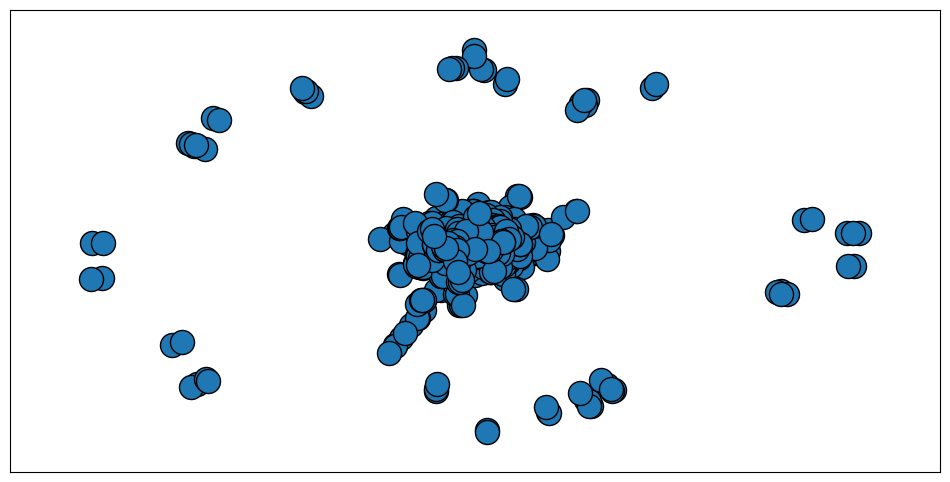

In [15]:
nx.draw_networkx(hamsterster, with_labels=False, edgecolors='k')

In [ ]:
pos = nx.random_layout(hamsterster) # Position nodes uniformly at random in the unit square.
nx.draw_networkx(hamsterster, pos, with_labels=False, edgecolors='k')

In [ ]:
pos = nx.spring_layout(hamsterster)
nx.draw_networkx(hamsterster, pos, with_labels=False, edgecolors='k')

Spring layout uses the Force-directed graph drawing algorithms which are a class of algorithms for drawing graphs in an aesthetically pleasing way. Their purpose is to position the nodes of a graph in two-dimensional or three-dimensional space so that all the edges are of more or less equal length and there are as few crossing edges as possible. 

**Note:**
**Graph drawing** is an area of mathematics and computer science combining methods from geometric graph theory and information visualization to derive two-dimensional depictions of graphs arising from applications such as social network analysis, cartography, and bioinformatics.
This drawing should not be confused with the graph itself: very different layouts can correspond to the same graph.

Instead of explore better ways to shape the graph, or layouts, and fine tune the parameters. 
We can extract information from the graph without seeing it. Basic graph properties include number of nodes, of edges and average degree:

In [ ]:
hamsterster_n, hamsterster_k = hamsterster.order(), hamsterster.size()
# order() - Return the number of nodes in the graph.
# size() - Return the number of edges.
hamsterster_avg_deg = hamsterster_k / hamsterster_n
print("Nodes: ", hamsterster_n)
print("Edges: ", hamsterster_k)
print("Average degree: ", hamsterster_avg_deg)

We are starting to know the graph. Let's take a look to the degrees. A good way of doing that, is by computing a **degree distribution** of the graph and plot it. If the graph were directed, we would need to generate two distributions, one for the in-degree and othre for the out-degree.

First, we compute the degree sequence, which is just a list containing all the degrees but sorted.

In [ ]:
degrees = dict(hamsterster.degree()).values() # degree returns a view object DegreeView  
degree_sequence = sorted(degrees, reverse=True)  # degree sequence of all nodes
plt.plot(degree_sequence, 'b-', marker='o')
plt.xlabel('Nodes')
plt.ylabel('Degree')
plt.title('Sorted nodes degree of the Hamsterster friendships network')

It might be useful to present plots using logarothmic base for the axes. We do that with `matplotlib.loglog()` function.

In [ ]:
plt.loglog(degree_sequence, 'b-', marker='o')
plt.xlabel('Nodes (log)')
plt.ylabel('Degree (log)')
plt.title('Sorted nodes degree of the Hamsterster friendships network (loglog)')

To plot the degree distribution we use hist of matplotlib:

In [ ]:
degree_hist = plt.hist(list(degrees), 100)
plt.xlabel('Degree')
plt.ylabel('# nodes')
plt.title('Degree distribution of the Hamsterster friendships network')
plt.show()

Networks with power-law distributions are called **scale-free networks**, meaning a large number of edges are distributed among a small number of nodes, and a small number of edges are distributed among a large number of nodes. In short, a few nodes are hogging all the connections. 


So, the average degree is 6, and next we can see that aproximately 3/4 of the nodes have a degree smaller than 15 and only 1/4 have a degree larger than 15:

In [ ]:
small_degree = [x for x in degree_sequence if x <= 15]
size(small_degree)

In [ ]:
large_degree = [x for x in degree_sequence if x > 15]
size(large_degree)

In [ ]:
very_small_degree = [x for x in degree_sequence if x <= 1]
size(very_small_degree)

To see more about the degree distribution of a network see [here](http://mathinsight.org/degree_distribution) and for scale-free networks see [here](http://mathinsight.org/scale_free_network).

**Exercise 1**: 
<ol>

Using another small graph from KONECT, download the dataset, load it into NetworkX, run the basic analysis, and plot the degree distribution. If you choose a directed graph, remember to plot in-degree and out-degree.

</ol>
</div>


In [ ]:
#Answer here!

### 2.2 Connected Components

Let's take a second look to our `hamsterster` network data set.

In [ ]:
nx.draw_networkx(hamsterster)

How many components do you think the graph has? It's hard to tell by looking to the image. Let's find out by using NetworkX's `nx.connected_components()`.

In [ ]:
# number of connected components:
nx.number_connected_components(hamsterster)

**Connected component** refers to a subset of the graph where there is a **path between any pair of nodes within this subset, and any node in the subset is connected to any node outside of it**. In simpler terms, a connected component is a maximal subgraph where all the nodes are directly or indirectly connected to each other.

**Example**:

*Imagine a network graph as a map of islands and bridges. Each island is a node, and each bridge is a connection (edge) between two islands.*

**What is a Connected Component?**

- Group of Islands: A connected component is like a group of islands where you can travel from any island to any other island within the group using the bridges. You don't need to swim; there's always a bridge path that connects them.

- No Outside Bridges: There are no bridges connecting the islands in this group to islands in other groups. So, once you're on an island in a connected component, you can't get to islands in another connected component without leaving the group.

In summary, a connected component is like a self-contained cluster of nodes in a graph, where all the nodes are reachable from each other, but none of them are connected to nodes outside the cluster.

And how big is the biggest, and how small the smallest?

In [ ]:
# Complete here:


In this case, we can say that the network has one giant component with 1788 nodes. 

But, what more? How can we measure the importance of the nodes?

### 2.3 Centrality


**Centrality** of a node **measures its relative importance** within the graph. And there are many ways of calculating centrality, each one with a slightly different meaning.

In practice, what centrality means is usually answered by "it depends":
- It depends on the data—what does it mean that two people are connected? Did they just "friend each other" on a social networking site or do they have a deeper connection? 
- It depends on whether the links mean information exchange, or responsibility (as in the case of organizational networks). 
- It depends on the understanding of power and influence that is desired as an output.



Applications include:
- Identifying the most influential person(s) in a social network
- Key infrastructure nodes in the Internet or urban networks
- Super spreaders of disease

Centrality concepts were first developed in social network analysis, and many of the terms used to measure centrality reflect their sociological origin.

Four of the measures of node centrality that have been proposed are: 
- The degree centrality
- The betweenness centrality
- The closeness centrality
- The eigenvector centrality

Additionally, you can distinguish between 'absolute' centrality measures, indicating a non comparable value and those that are standardized measures called 'relative'.



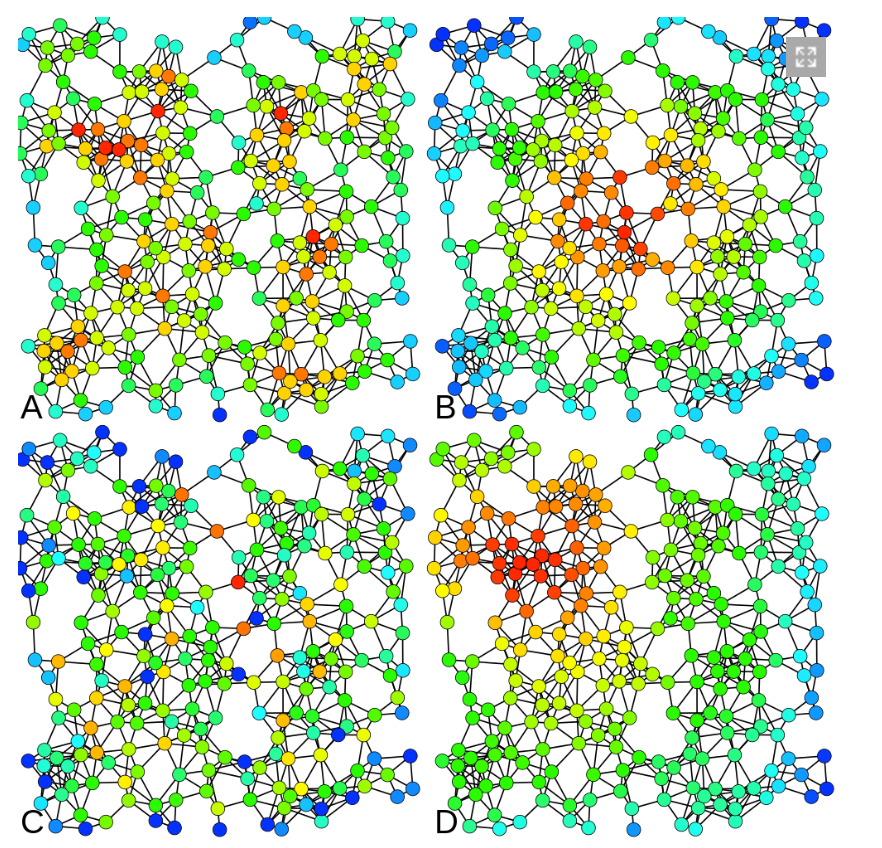
    
Examples of A) Degree centrality, B) Closeness centrality, C) Betweenness centrality, D) Eigenvector centrality ([Wiki](http://en.wikipedia.org/wiki/Centrality)). 
</div>



#### The degree centrality

The degree centrality of a node is defined as the number of links incident upon this node (i.e., the number of ties that a node has). The degree can be interpreted in terms of the immediate risk of a node for catching whatever is flowing through the network (such as a virus, or some information). In the case of a directed network (where ties have direction), we usually define two separate measures of degree centrality, namely indegree and outdegree. Accordingly, indegree is a count of the number of ties directed to the node and outdegree is the number of ties that the node directs to others. When ties are associated to some positive aspects such as friendship or collaboration, indegree is often interpreted as a form of **popularity**, and outdegree as **gregariousness**.

The more connected to other nodes a node is, the higher its degree centrality. It's somehow measuring the "celebrities" of the graph.


#### Betweenness centrality

Betweenness centrality quantifies the **number of times a node acts as a bridge along the shortest path** between two other nodes. In other words, betweenness has to do with how often a node crops up when taking a best path (there may be more than one) between two other nodes.

It was introduced as a measure for quantifying the control of a person on the communication between other persons in a social network by Linton Freeman. Nodes that have a high probability to occur on a shortest path between two randomly chosen nodes have a high betweenness.

By definition, the betweenness centrality of a node depends on the connection properties of every pair of nodes in the graph, except pairs with it, whereas degree centrality depends only on the node's neighbors. Then, betweenness is **less local** than degree centrality.

(Source: *Wikipedia* and [notebook](http://nbviewer.ipython.org/github/versae/data_for_humanists/blob/master/class19.ipynb)).

**Formal definitions**:
    
The ***degree centrality*** of a node $v$, for a given graph $G:=(V,E)$ with $|V|$ vertices or nodes and $|E|$ edges, is defined as 

$C_D(v)= \text{deg}(v)$.

*Note: $\text{deg}(v)$ is the degree of node $v$ which is the number of edges incident to the node, with loops counted twice.*


The ***betweenness*** of a node $v$ in a graph $G:=(V,E)$ with $|V|$ vertices is computed as follows:
1. For each pair of vertices $(s,t)$, compute the shortest paths between them.
2. For each pair of vertices $(s,t)$, determine the fraction of shortest paths that pass through the node in question (here, node $v$).
3. Sum this fraction over all pairs of vertices $(s,t)$.

More compactly the betweenness can be represented as:

$C_B(v)= \sum_{s \neq v \neq t \in V}\frac{\sigma_{st}(v)}{\sigma_{st}}$

where $\sigma_{st}$ is total number of shortest paths from node $s$ to node $t$ and $\sigma_{st}(v)$ is the number of those paths that pass through $v$. The betweenness may be normalised by dividing through the number of pairs of vertices not including v, which for directed graphs is $(n-1)(n-2)$ and for undirected graphs is $(n-1)(n-2)/2$.


**Example**:
For example, in an undirected star graph, the center node (which is contained in every possible shortest path) would have a betweenness of 1, if normalised, while the leaves (which are contained in no shortest paths) would have a betweenness of 0.


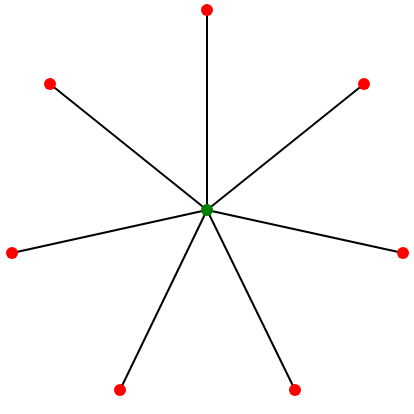
</div>

**Example:**

Let's illustrate the computation of the degree centrality and betweenness centrality in the following simple graph (with 7 nodes and 9 edges):


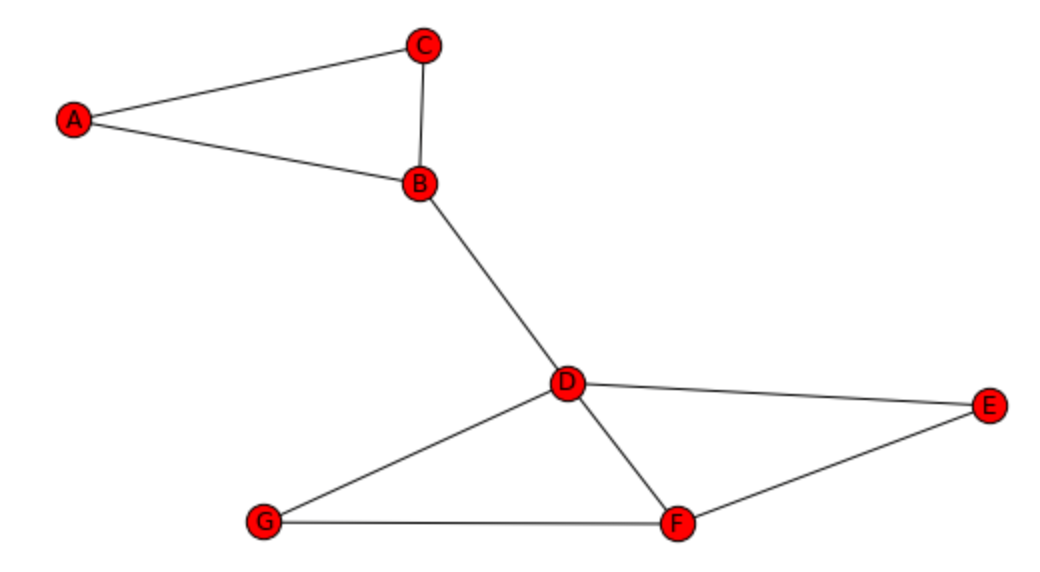
</div>

Given the graph in the Figure, compute the following measures:
- Degree centrality of $A$, $B$ and $D$
- Betweenness of $A$, $B$ and $D$.


Manual solution here:

**Degree centrality** of $A$ is computed as the number of edges incident to $A$ (2) divided by the total number of node except $A$ (6): 

> For $A$ is $ 2 / 6 = \mathbf{0.33333}.$

> For $B$ is $ 3 / 6 = \mathbf{0.5}.$

> For $D$ is $ 4 / 6 = \mathbf{0.66666}.$


**Betweenness** of node $v$ is computed using total number of shortest paths from node $s$ to node $t$ and the number of those paths that pass through $v$, where $s \neq v \neq t \in V$

>  A is not in any shortest path connecting any other pair of vertices. Thus, betweenness of A is **0**

> B is on all shortest paths connecting any of {A,C} to any of {D,E,F,G}. Thus, there are $2*4 = 8$ shortest paths that pass through $B$. The total number of shortest paths from a pair of nodes different of $B$ is (n-1)(n-2)/2 = 15, (n=7).
Finally,  betweenness of $B$ is 8 / 15  = **0.53333**

> $D$ is on all shortest paths connecting any of $\{A,B,C\}$ to any of $\{E,F,G\}$ plus one of the two shorthest paths between $(E,G)$. Thus, there are $3*3 + 1/2 =9.5$ shortest paths that pass through $D$. The total number of shortest paths from a pair of nodes different of $D$ is $(n-1)(n-2)/2 = 15 $.
Finally, betweenness of $B$ is $ 9.5 / 15  = \mathbf{0.63333}$

The same example in Python:

In [ ]:
# Python solution here
#create an empty graph
G = nx.Graph()

#add three edges
G.add_edge('A','B');
G.add_edge('A','C');
G.add_edge('C','B');
G.add_edge('B','D');
G.add_edge('D','G');
G.add_edge('G','F');
G.add_edge('D','F');
G.add_edge('F','E');
G.add_edge('D','E');

#draw the graph
nx.draw_networkx(G)


In [ ]:
degree = nx.degree_centrality(G)
# Once we are calculated degree centrality, we sort the results to see which nodes are more central.
sorted(degree.items(), key=lambda x: x[1],reverse = True)[:10]

In [ ]:
betweenness = nx.betweenness_centrality(G)
# And we sort the results to see which nodes are more central.
sorted(betweenness.items(), key=lambda x: x[1],reverse = True)[:10]

**Exercise 2**: 
<ol>

Order the nodes in the next Graph by Degree Centrality and Betweenness Centrality


</ol>
</div>

In [ ]:
# Python solution here
#create an empty graph
G = nx.Graph()

#add three edges
G.add_edge('A','B');
G.add_edge('A','C');
G.add_edge('C','B');
G.add_edge('B','D');
G.add_edge('D','E');
G.add_edge('E','G');
G.add_edge('G','F');
G.add_edge('E','F');
G.add_edge('F','E');


#draw the graph
nx.draw_networkx(G)


In [ ]:
# Your solution using Degree Centrality here
# To complete

In [ ]:
# Your solution using Betweenness Centrality here
# To complete

A very centralized network is dominated by one or a few very central nodes. If these nodes are removed or damaged, the network quickly fragments into unconnected sub-networks. **Hubs** are nodes with high degree and betweeness centrality.

### Continue with the Hamsterster example

Let's compute the degree centrality of hamsterster graph. 

In [ ]:
degree = nx.degree_centrality(hamsterster)
# Once we are calculated degree centrality, we sort the results to see which nodes are more central.
sorted(degree.items(), key=lambda x: x[1],reverse = True)[:10]

In [ ]:
# Compute the degree histogram
degree_hist = plt.hist(list(degree.values()), 100)
plt.xlabel('Degree centrality')
plt.ylabel('Number of nodes')
plt.title('Degree centrality histogram')

In [ ]:
# Compute the degree histogram and plot it using base 10 for the axes.
degree_hist = plt.hist(list(degree.values()), 100)
plt.loglog(degree_hist[1][1:], degree_hist[0], 'b', marker='o')
plt.xlabel('Degree centrality')
plt.ylabel('Number of nodes')
plt.title("Degree centrality histogram (loglog)")

It seems like there is an interesting cluster which corresponds to low degrees. Let's try to trim the graph and draw it.

In [ ]:
# Return a new graph object that contains the network with pendant and
# isolated nodes removed
def trim_degrees(graph, degree=1):
    g = graph.copy()
    d=dict(nx.degree(g))
    for node in graph.nodes():
        if d[node] <= degree:
            g.remove_node(node)
    return g

len(trim_degrees(hamsterster))

What happen if we consider only the graph nodes with more than 25 degree centrality?



In [ ]:
len(trim_degrees(hamsterster, degree=25))

This graph is much smaller (from 1858 to 258 nodes).

In [ ]:
# Plot this new smaller graph
g = trim_degrees(hamsterster, degree=25)
pos = nx.spring_layout(g)
nx.draw_networkx_nodes(g,pos,alpha=0.6)
nx.draw_networkx_edges(g,pos,alpha=0.1)

Let's compute the betweenness of the original graph:

In [ ]:
betweenness = nx.betweenness_centrality(hamsterster)
# And we sort the results to see which nodes are more central.
sorted(betweenness.items(), key=lambda x: x[1],reverse = True)[:10]

The most central node is 237, but the second one and the order of the rest are different than in the degree centrality.


### Closeness centrality

Ability to move information from one side of the network to another (i.e., gossip) is an important step towards establishing a shared perception of the world, whether it has to do with someone's choice of outfits at a party or the formation of a political movement. Therefore, **an important node is typically "close" to, and can communicate quickly with, the other nodes in the network**. That's the main idea behind closeness centrality.
Closeness centrality is based on distance calculation and tries to quantify the intuitive notion of what position a node occupies, if central or peripheral.



In [ ]:
# Let's compute the closeness centrality
closeness = nx.closeness_centrality(hamsterster)
# And we sort the results to see which nodes are more central.
sorted(closeness.items(), key=lambda x: x[1],reverse = True)[:10]


### Eigenvector centrality

Eigenvector centrality is a **measure of the influence of a node in a network**. It assigns relative scores to all nodes in the network based on the concept that connections to high-scoring nodes contribute more to the score of the node in question than equal connections to low-scoring nodes. 
For this measure, an important node is connected to important neighbors.

In [ ]:
# Let's compute the closeness centrality
eigenvector = nx.eigenvector_centrality(hamsterster)
# And we sort the results to see which nodes are more central.
sorted(eigenvector.items(), key=lambda x: x[1],reverse = True)[:10]

### Betweenness for edges

Given the set of shortest paths between all node pairs, the *betweenness centrality* of an edge e is simply the **proportion of those which pass through e**. To get a better feel for the intuition, it often helps to think of a network as having traffic: Travelers start out from each node with their destinations evenly divided among the other nodes, always choosing best paths for their journeys. In this situation, the node with the highest betweenness will have the most traffic.


### Current flow betweenness centrality

Newman, the author of this measure, calls it "random walk centrality". The current flow centrality of a node can be defined as the **probability of passing through it on a random walk starting at some node and ending at some other node (neither equal to initial)**. Newman argues that betweenness for some social networks should not be computed just as a function of shortest paths, but of all paths, assigning the shortest the greatest weight. This is because messages in such networks may get to where they are going not by the shortest path, but by a random path, such as that of infectious disease through a contact network.


This measure needs connected graphs, so we will first extract the first component of our `hamsterster` example as a subgraph, and then apply the measure (it can take a while).

In [ ]:
hamsterster_subgraph = (hamsterster.subgraph(c) for c in nx.connected_components(hamsterster))
hamsterster_subgraph = list(hamsterster_subgraph)[0]

In [ ]:
current_flow = nx.current_flow_betweenness_centrality(hamsterster_subgraph)
sorted(current_flow.items(), key=lambda x: x[1],reverse = True)[:10]

Now, the result is different.

### Drawing centrality

One way to represent centrality is by modifying nodes size or color depending on this measure. As we have seen, NetworkX has parameters in its function nx.draw() to assign a list of sizes to node_size, a list of RGB colors to node_color, and the list of nodes to node_list. The sizes must be greater than 1, otherwise you won't see anything.


In [ ]:
hamsTrim = trim_degrees(hamsterster, degree=25)
posHamTrim = nx.spring_layout(hamsTrim,iterations=1000) # Spring layout can iterate 
## Do it once and save it, since it is very time consuming.
np.save('posHamTrim.npy', posHamTrim)

In [ ]:
# Once is saved it you can load the positions
#posHamTrim = np.load('posHamTrim.npy').item()

In [ ]:
# Degree centrality:
degreeHamTrim = nx.degree_centrality(hamsTrim)

nsize = np.array([v for v in degreeHamTrim.values()])
cte=1000
nsize = cte*(nsize  - min(nsize))/(max(nsize)-min(nsize))

nodes=nx.draw_networkx_nodes(hamsTrim,pos=posHamTrim,  node_size=nsize, alpha=.6)
edges=nx.draw_networkx_edges(hamsTrim,pos=posHamTrim, alpha=.1)



In [ ]:
# Betweenness centrality:
degreeHamTrim = nx.betweenness_centrality(hamsTrim)

nsize = np.array([v for v in degreeHamTrim.values()])
cte=1000
nsize = cte*(nsize  - min(nsize))/(max(nsize)-min(nsize))

nodes=nx.draw_networkx_nodes(hamsTrim,pos=posHamTrim,  node_size=nsize, alpha=.6)
edges=nx.draw_networkx_edges(hamsTrim,pos=posHamTrim, alpha=.1)



In [ ]:
# Closeness centrality:
degreeHamTrim = nx.closeness_centrality(hamsTrim)

nsize = np.array([v for v in degreeHamTrim.values()])
cte=1000
nsize = cte*(nsize  - min(nsize))/(max(nsize)-min(nsize))

nodes=nx.draw_networkx_nodes(hamsTrim,pos=posHamTrim,  node_size=nsize, alpha=.6)
edges=nx.draw_networkx_edges(hamsTrim,pos=posHamTrim, alpha=.1)



#### HIV Dataset

Let us draw another example where we can study the importance of the nodes.

We download the [*HIV dataset*](http://konect.cc/networks/hiv/) from [KONECT](http://konect.cc) collection. This dataset represents an undirected and unweighted network that contains a network of sexual contacts between people involved in the early spread of the human immunodeficiency virus (HIV), in the United States of America (USA).
This network is the origin of the phrase "patient zero," referring a person from which an infection spreads initially.  Edges are undirected.


The HIV dataset is defined by an adjacency matrix of the network in whitespace-separated values format, with one edge per line. For commodity, the file is uncompressed and ready in `files/hiv/out.hiv`

Let's read the file and draw the network.


In [ ]:
hiv = nx.read_adjlist("files/hiv/out.hiv")

In [ ]:
nx.draw_networkx(hiv)

In [ ]:
pos = nx.random_layout(hiv) # Position nodes uniformly at random in the unit square.
nx.draw_networkx(hiv, pos)

In [ ]:
# Clean the data

In [ ]:
# How many components the graph has?

# To complete

In [ ]:
# How big they are?

# To complete

In [ ]:
# Create subgraphs from the connected components

# To complete

In [ ]:
# Which nodes these subgraphs have?

# To complete

In [ ]:
# Remove the nodes which are not correct

# To complete

In [ ]:
# Draw the graph after the cleaning

# To complete

In [ ]:
# Draw the network modifying nodes size according to the degree centrality

# To complete

In [ ]:
# Draw the network modifying nodes size according to the betweenness centrality

# To complete

In [ ]:
# Draw the network modifying nodes size according to the closeness centrality

# To complete

In [ ]:
# Draw the network modifying nodes size according to the eigenvector centrality

# To complete

Still can be improved. Maybe colouring the nodes?

**Exercise 3**: 
<ol>

Plot a network using a centrality measure to modify the colors of the nodes. Scale the colors in such a way that 25% of highest central nodes are blue, 25% next are green, 25% next are red, and the final 25% are white.

</ol>
</div>

In [ ]:
# Your solution here

### 2.4 Ego networks

Ego networks are **subnetworks that are centered on a certain node**. On Facebook and LinkedIn, these are simply described as "your network". You can only access your own ego networks, and can't do a broader survey. Having a larger dataset allows us to survey and compare ego networks of various people.


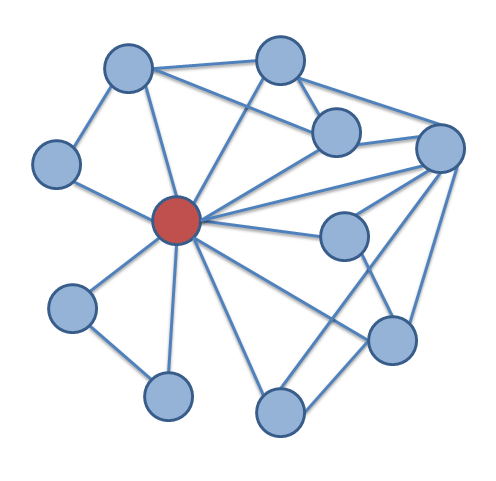
    
Example of an ego network, [wiki](http://en.wikibooks.org/wiki/Transportation_Geography_and_Network_Science/Social_networks). 
</div>

We need to think about the idea of what it means to be connected in a social network, and what **network distance** means. In the most basic case, a link means that "Alice is friends with Bob," a distance of 2
means "Carol is a friend of a friend of Alice," and a distance of 3 means that "Dave is
a friend of a friend of a friend of Alice." Intuitively, we understand that while we know quite a bit about our friends, and we know something about some of our friends' friends, we know nearly nothing about our friends' friends' friends. Formally, this concept is known as a **Horizon of Observability**, a concept loosely borrowed from physics and the notion of the observable universe. 


Extraction of ego networks is quite simple, as NetworkX provides a ready-made function to do the job. In our `hamsterster` data set, the node `237` is always high in centrality, so let us compute the ego network of this node:

In [ ]:
ego = nx.ego_graph(hamsterster, '237')

Knowing the size of an ego network is important to understand the reach of the information that a person can transmit (or, conversely, have access to).

In [ ]:
nx.number_of_nodes(ego)

Let's expand the raidus up to 2.

In [ ]:
len(nx.ego_graph(hamsterster, '237', radius=2))


Wow! That's quite different. When we expand the radius to 2, friend of a friend, our famous node 237 is able to reach up to 1,148 nodes.


#### Clustering

Another interesting metric is called **clustering coefficient**. Essentially, it measures the proportion of your friends that are also friends with each other (mutual trust). 

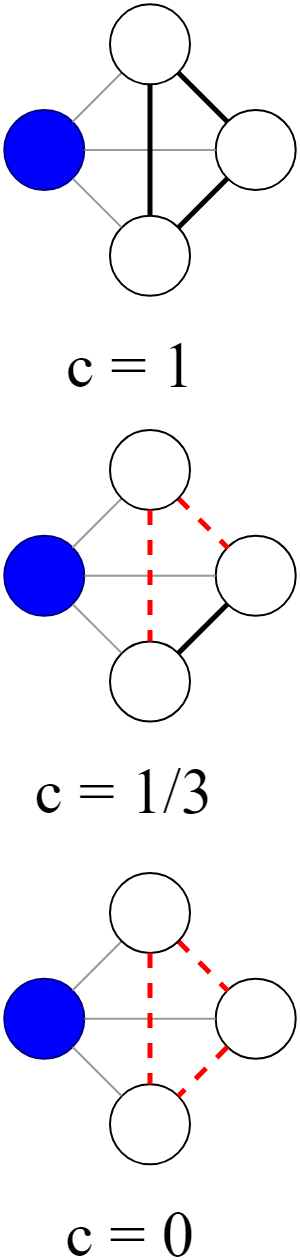
    
Example of local clustering coefficients on an undirected graph, [Wiki](http://en.wikipedia.org/wiki/Clustering_coefficient). 
</div>

This metric can be applied to entire networks, but in a large network with widely varying densities and multiple cores, average clustering is difficult to interpret. 

In ego networks, the interpretation is simple: 
* Dense ego networks with a lot of mutual trust have a high clustering coefficient. 
* Star networks with a single broadcast node and passive listeners have a low clustering coefficient.


In [ ]:
nx.average_clustering(ego)

Its clustering coefficient shows that it is in a moderate trust network of friends.

#### Cliques

In the mathematical area of graph theory, a *clique* in an undirected graph is a subset of its nodes such that every two vertices in the subset are connected by an edge.


    
[Clique of size 5](http://es.wikipedia.org/wiki/Clique). 
</div>


In social networks, cliques are groups of people who all know each other.

In [ ]:
print('Maximum clique size:')
print(nx.graph_clique_number(ego))
# Return the clique number (size of the largest clique) for G.